In [1]:
import requests                   #scaricare il sito come blocco di stringhe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup      # trasforma la struttura HTML in stringa

In [2]:
#memorizziamo il sito in una variabile
wiki_url = "https://it.wikipedia.org/wiki/Demografia_d%27Italia"
#interroghiamo l'URL
pagina_wiki = requests.get(wiki_url).text

In [3]:
# parsing del contenuto HTML
soup = BeautifulSoup(pagina_wiki, 'html.parser')

In [4]:
#filtro tutti i tag 'table' che sono stati parsati
tabelle = soup.find_all('table')
#itero la stampa della classe dei tag table
for t in tabelle:
  print(t.get('class'))

['wikitable']
['wikitable']
['wikitable']
['wikitable']
['vedi-anche', 'noprint']
['toc']
None
None
['vedi-anche', 'noprint']
['wikitable', 'sortable']
['wikitable']
['vedi-anche', 'noprint']
['wikitable', 'sortable']
['wikitable', 'sortable']
['noprint']


In [5]:
#ottenere la seconda tabella in formato array
data_list = pd.read_html(str(tabelle[1]))
#associo il primo elemento della lista alla collezione di dati
# per raggiungere tutti gli elementi
df = pd.DataFrame(data_list[0])
display(df)

Anno  Popolazione1º gennaio          Natalità  \
                 Anno  Popolazione1º gennaio              Nati   
0                1862             26.328.000           991.000   
1                1863             26.507.000         1.026.000   
2                1864             26.712.000         1.000.000   
3                1865             26.915.000         1.024.000   
4                1866             27.131.000         1.044.000   
..                ...                    ...               ...   
159              2021             59.236.213           399.431   
160              2022             58.983.122               NaN   
161              Anno  Popolazione1º gennaio          Natalità   
162              Anno  Popolazione1º gennaio              Nati   
163  * = dati stimati       * = dati stimati  * = dati stimati   

                              Mortalità                       Saldonaturale  \
            Tasso (%)             Morti         Tasso (%)     Saldonaturale   
0                 375           815.000               309          +176.000   
1                 386           824.000               310          +202.000   
2                 373           802.000               299          +198.000   
3                 379           812.000               300          +212.000   
4                 383           798.000               293          +246.000   
..                ...               ...               ...               ...   
159                67           709.035               120          -309.604   
160               NaN               NaN               NaN               NaN   
161          Natalità         Mortalità         Mortalità     Saldonaturale   
162         Tasso (%)             Morti         Tasso (%)     Saldonaturale   
163  * = dati stimati  * = dati stimati  * = dati stimati  * = dati stimati   

    Tasso difeconditàtotale[10][21]  
    Tasso difeconditàtotale[10][21]  
0                               493  
1                               490  
2                               490  
3                               491  
4                               491  
..                              ...  
159                             125  
160                             NaN  
161        Tasso difecondità totale  
162        Tasso difecondità totale  
163                * = dati stimati  

[164 rows x 8 columns]

In [6]:
#Siccome ci sono due header li precisiamo per entrare nel dato
#   Escludiamo le ultime righe in cui viene ripetuto l'header[:-4]
anno_str = df['Anno']['Anno'].to_numpy()[:-4]
popolazione_str = df['Popolazione1º gennaio']['Popolazione1º gennaio'].to_numpy()[:-4]
nati_str = df['Natalità']['Nati'].to_numpy()[:-4]
morti_str = df['Mortalità']['Morti'].to_numpy()[:-4]

In [7]:
def conversione_stringhe_interi(data_str: np.array(str)) -> np.array(np.int64):
  #creiamo un array di zeri con dimensione uguale al valore passato come parametro
  data = np.zeros_like(data_str) 
  for i in range(data_str.size):
    #sostituisco '.' con ''
    data[i] = np.int64(data_str[i].replace('.', ''))
  #ritorno la collezione di dati creata
  return data

In [8]:
#creiamo stringhe contenenti i dati delle colonne che ci interessano
  #per l'anno e' sufficiente una conversione del tipo
anno = anno_str.astype(int) #per convertire la stringa della sezione precende in valori interi
popolazione = conversione_stringhe_interi(popolazione_str)
nati = conversione_stringhe_interi(nati_str)
morti = conversione_stringhe_interi(morti_str)

In [9]:
#creiamo un dataframe con la stessa dimensione dell'array anno
#specifichiamo il nome delle colonne del nuovo dataframe
#convertiamo i valori NaN in 0
demo_df = pd.DataFrame(index = range(anno.size), columns=['anno','nati','morti','popolazione']).fillna(0)
#riempiamo il df
demo_df['anno'] = anno
demo_df['nati'] = nati
demo_df['morti'] = morti
demo_df['popolazione'] = popolazione

In [10]:
#creiamo un file csv dal dataframe appena generato
demo_df.to_csv('demo_italia_1862_2021.csv')
#in questo modo salvo in memoria solo i dati che effettivamente dovro' utilizzare

In [11]:
class DataDemo:
  def __init__ (self):
    self.df = pd.read_csv("/content/demo_italia_1862_2021.csv")
  
  def get_anno(self) -> np.array(np.int64):
    return self.df['anno'].to_numpy(np.int64)
  
  def get_nati(self) -> np.array(np.float64):
    return self.df['nati'].to_numpy(np.float64)

  def get_popolazione(self) -> np.array(np.float64):
    return self.df['popolazione'].to_numpy(np.float64)

  def get_morti(self) -> np.array(np.float64):
    return self.df['morti'].to_numpy(np.float64)

In [12]:
class Plot:
  def __init__(self, sizex:int, sizey:int):
    self.x = np.zeros(sizex)
    self.y = np.zeros(sizey)

  #label nome associato alla legenda dei dati che verranno rappresentati
  def tracciato(self, x:np.array, y:np.array, label:str, colore:str):
    self.x = x
    self.y = y
    plt.plot(self.x, self.y, label=label, color=colore)

  def dispersione(self, x:np.array, y:np.array, label:str,
                  colore:str, dimensione:np.int64, trasparenza: np.float64):
    self.x = x
    self.y = y
    plt.scatter(self.x, self.y, color=colore,
                s=dimensione, alpha=trasparenza)

In [36]:
df = DataDemo()
display(df.df)

,Unnamed: 0,anno,nati,morti,popolazione
0,0,1862,991000,815000,26328000
1,1,1863,1026000,824000,26507000
2,2,1864,1000000,802000,26712000
3,3,1865,1024000,812000,26915000
4,4,1866,1044000,798000,27131000
...,...,...,...,...,...
155,155,2017,458151,649061,60066734
156,156,2018,439747,633133,59937769
157,157,2019,420084,634417,59816673
158,158,2020,404892,746146,59641488


In [14]:
anno = df.get_anno()
nati = df.get_nati()
morti = df.get_morti()
popolazione = df.get_popolazione()

In [ ]:
#facciamo i grafici
progressione_popolazione = Plot(anno.size, anno.size)
progressione_popolazione.tracciato(anno, popolazione, "Popolazione", "blue")
plt.title("Progressione della popolazione dal 1862 al 2021")
plt.legend(bbox_to_anchor=(1, 1.03))
plt.show()

progressione_nati = Plot(anno.size, anno.size)
progressione_nati.tracciato(anno, nati, "Nati", "green")
#progressione_nati.title("Progressione delle nascite dal 1862 al 2021")

#plt.show()

progressione_morti = Plot(anno.size, anno.size)
progressione_morti.tracciato(anno, morti, "Morti", "black")
#progressione_morti.title("Progressione delle morti dal 1862 al 2021")
plt.title("Progressione Nascite e Morti dal 1862 al 2021")
plt.legend(bbox_to_anchor=(1.32, 1.03))
plt.show()

In [ ]:
dispersione = Plot(anno.size, anno.size)
dispersione.dispersione(popolazione, nati, "Popolazione e Nati",
                                    "blue", 25, 0.5)

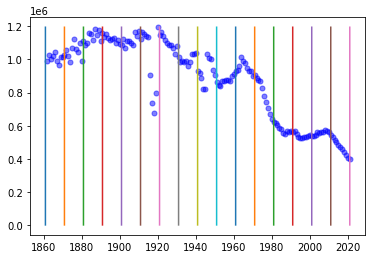

In [35]:
dispersione = Plot(anno.size, anno.size)

data_range = np.arange(0, np.max(nati))

#plt.plot(np.full(data_range.size, 1860), data_range)
#plt.plot(np.full(data_range.size, 1870), data_range)

annata = 1861
while annata<=2021:
  plt.plot(np.full(data_range.size, annata), data_range)
  annata+=10

dispersione.dispersione(anno, nati, "Anno e nati",
                                    "blue", 25, 0.5)
plt.show()

In [ ]:
percentile25 =  np.percentile(nati, 25)
print(percentile25)

In [48]:
#scrivo una condizione logica che crea una mappa di booleani
mask_1 = (df.df["anno"] >= 1862) & (df.df["anno"] <= 1892)
df1 = df.df[mask_1]
#display(df1)

mask_2 = (df.df["anno"] > 1892) & (df.df["anno"] < 1920)
mask_3 = (df.df["anno"] > 1920) & (df.df["anno"] < 1940)
mask_4 = (df.df["anno"] > 1960) & (df.df["anno"] < 1990)
df2 = df.df[mask_2]
df3 = df.df[mask_3]
df4 = df.df[mask_4]

In [62]:
#media nascite
media_nati_1 = np.mean(df1["nati"].to_numpy())
media_nati_2 = np.mean(df2["nati"].to_numpy())
media_nati_3 = np.mean(df3["nati"].to_numpy())
media_nati_4 = np.mean(df4["nati"].to_numpy())

print(media_nati_1)
print(media_nati_2)
print(media_nati_3)
print(media_nati_4)

#media mobile nati
media_mobile = np.array([media_nati_1, media_nati_2, media_nati_3, media_nati_4])

1071258.064516129
1073370.3703703703
1053157.894736842
782118.448275862


In [89]:
#media morti
media_morti_1 = np.mean(df1["morti"].to_numpy())
media_morti_2 = np.mean(df2["morti"].to_numpy())
media_morti_3 = np.mean(df3["morti"].to_numpy())
media_morti_4 = np.mean(df4["morti"].to_numpy())

print(media_morti_1)
print(media_morti_2)
print(media_morti_3)
print(media_morti_4)

#media mobile morti
media_mobile = np.array([media_nati_1, media_nati_2, media_nati_3, media_nati_4])

840806.4516129033
792444.4444444445
625473.6842105263
529088.3793103448


In [ ]:
#rappresentiamo la media mobile
media_plot = Plot(4,4)
media_plot.tracciato(np.arange(4),media_mobile,"media mobile","blue")
plt.show()

In [58]:
#varianza e deviazione standard
#come si comportano i dati rispetto alla media dei valori

varianza_nascite1 = np.var(df1["nati"].to_numpy())
deviazione_standard_nascite1 = np.std(df1["nati"].to_numpy())

varianza_nascite2 = np.var(df2["nati"].to_numpy())
deviazione_standard_nascite2 = np.std(df2["nati"].to_numpy())

varianza_nascite3 = np.var(df3["nati"].to_numpy())
deviazione_standard_nascite3 = np.std(df3["nati"].to_numpy())

varianza_nascite4 = np.var(df4["nati"].to_numpy())
deviazione_standard_nascite4 = np.std(df4["nati"].to_numpy())

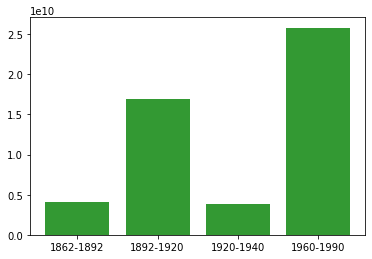

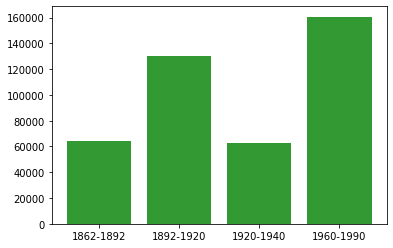

In [88]:
#plt.bar()
# x-> anni considerati
dati_x = np.array(["1862-1892","1892-1920","1920-1940","1960-1990"])
# y -> valori associati a gli anni considerati
dati_vy = np.array([varianza_nascite1, varianza_nascite2, varianza_nascite3, varianza_nascite4])
plt.bar(dati_x, dati_vy, color = "green", alpha=0.8, label="dati")
plt.show()
dati_dy = np.array([deviazione_standard_nascite1, deviazione_standard_nascite2, deviazione_standard_nascite3, deviazione_standard_nascite4])
plt.bar(dati_x, dati_dy, color = "green", alpha=0.8, label="dati")
plt.show()